## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Increasing Learning rate while optimizing with deterministic gradient descent

Assume that the objective function is 
$$
E(x,y)=
\left[\begin{array}{l}x-x_0 & y-y_0\end{array}\right]
M
\left[\begin{array}{l}x-x_0 \\ y-y_0\end{array}\right]
$$

where 

$$
\begin{array}{l}
&M =Q \Lambda Q^T \\
&\Lambda = \left[\begin{array}{ll}
\lambda_1 & 0 \\
0 & \lambda_2
\end{array}\right]\\
&Q = \left[\begin{array}{ll}
cos(\theta) & sin(\theta) \\
-sin(\theta) & cos(\theta)
\end{array}\right]\\
\end{array}
$$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [3]:
x0 = 0
y0 = 0
a = 1
b = 1/10
lambda1 = 1/a ** 2
lambda2 = 1/b ** 2
theta = np.pi / 4
Q = np.array([[np.cos(theta),  np.sin(theta)],
              [-np.sin(theta), np.cos(theta)]])
Lambda = np.array([[lambda1, 0],
                  [0, lambda2]])
M = Q @ Lambda @ Q.T

In [4]:
xs=np.arange(-4,4,0.1)
ys=np.arange(-4,4,0.1)
E = np.ndarray([len(xs),len(ys)])
for i,x in enumerate (xs):
    for j,y in enumerate(ys):
        p = np.array([x,y])
        E[i,j] = p.T @ M @ p
X, Y = np.meshgrid(xs, ys)

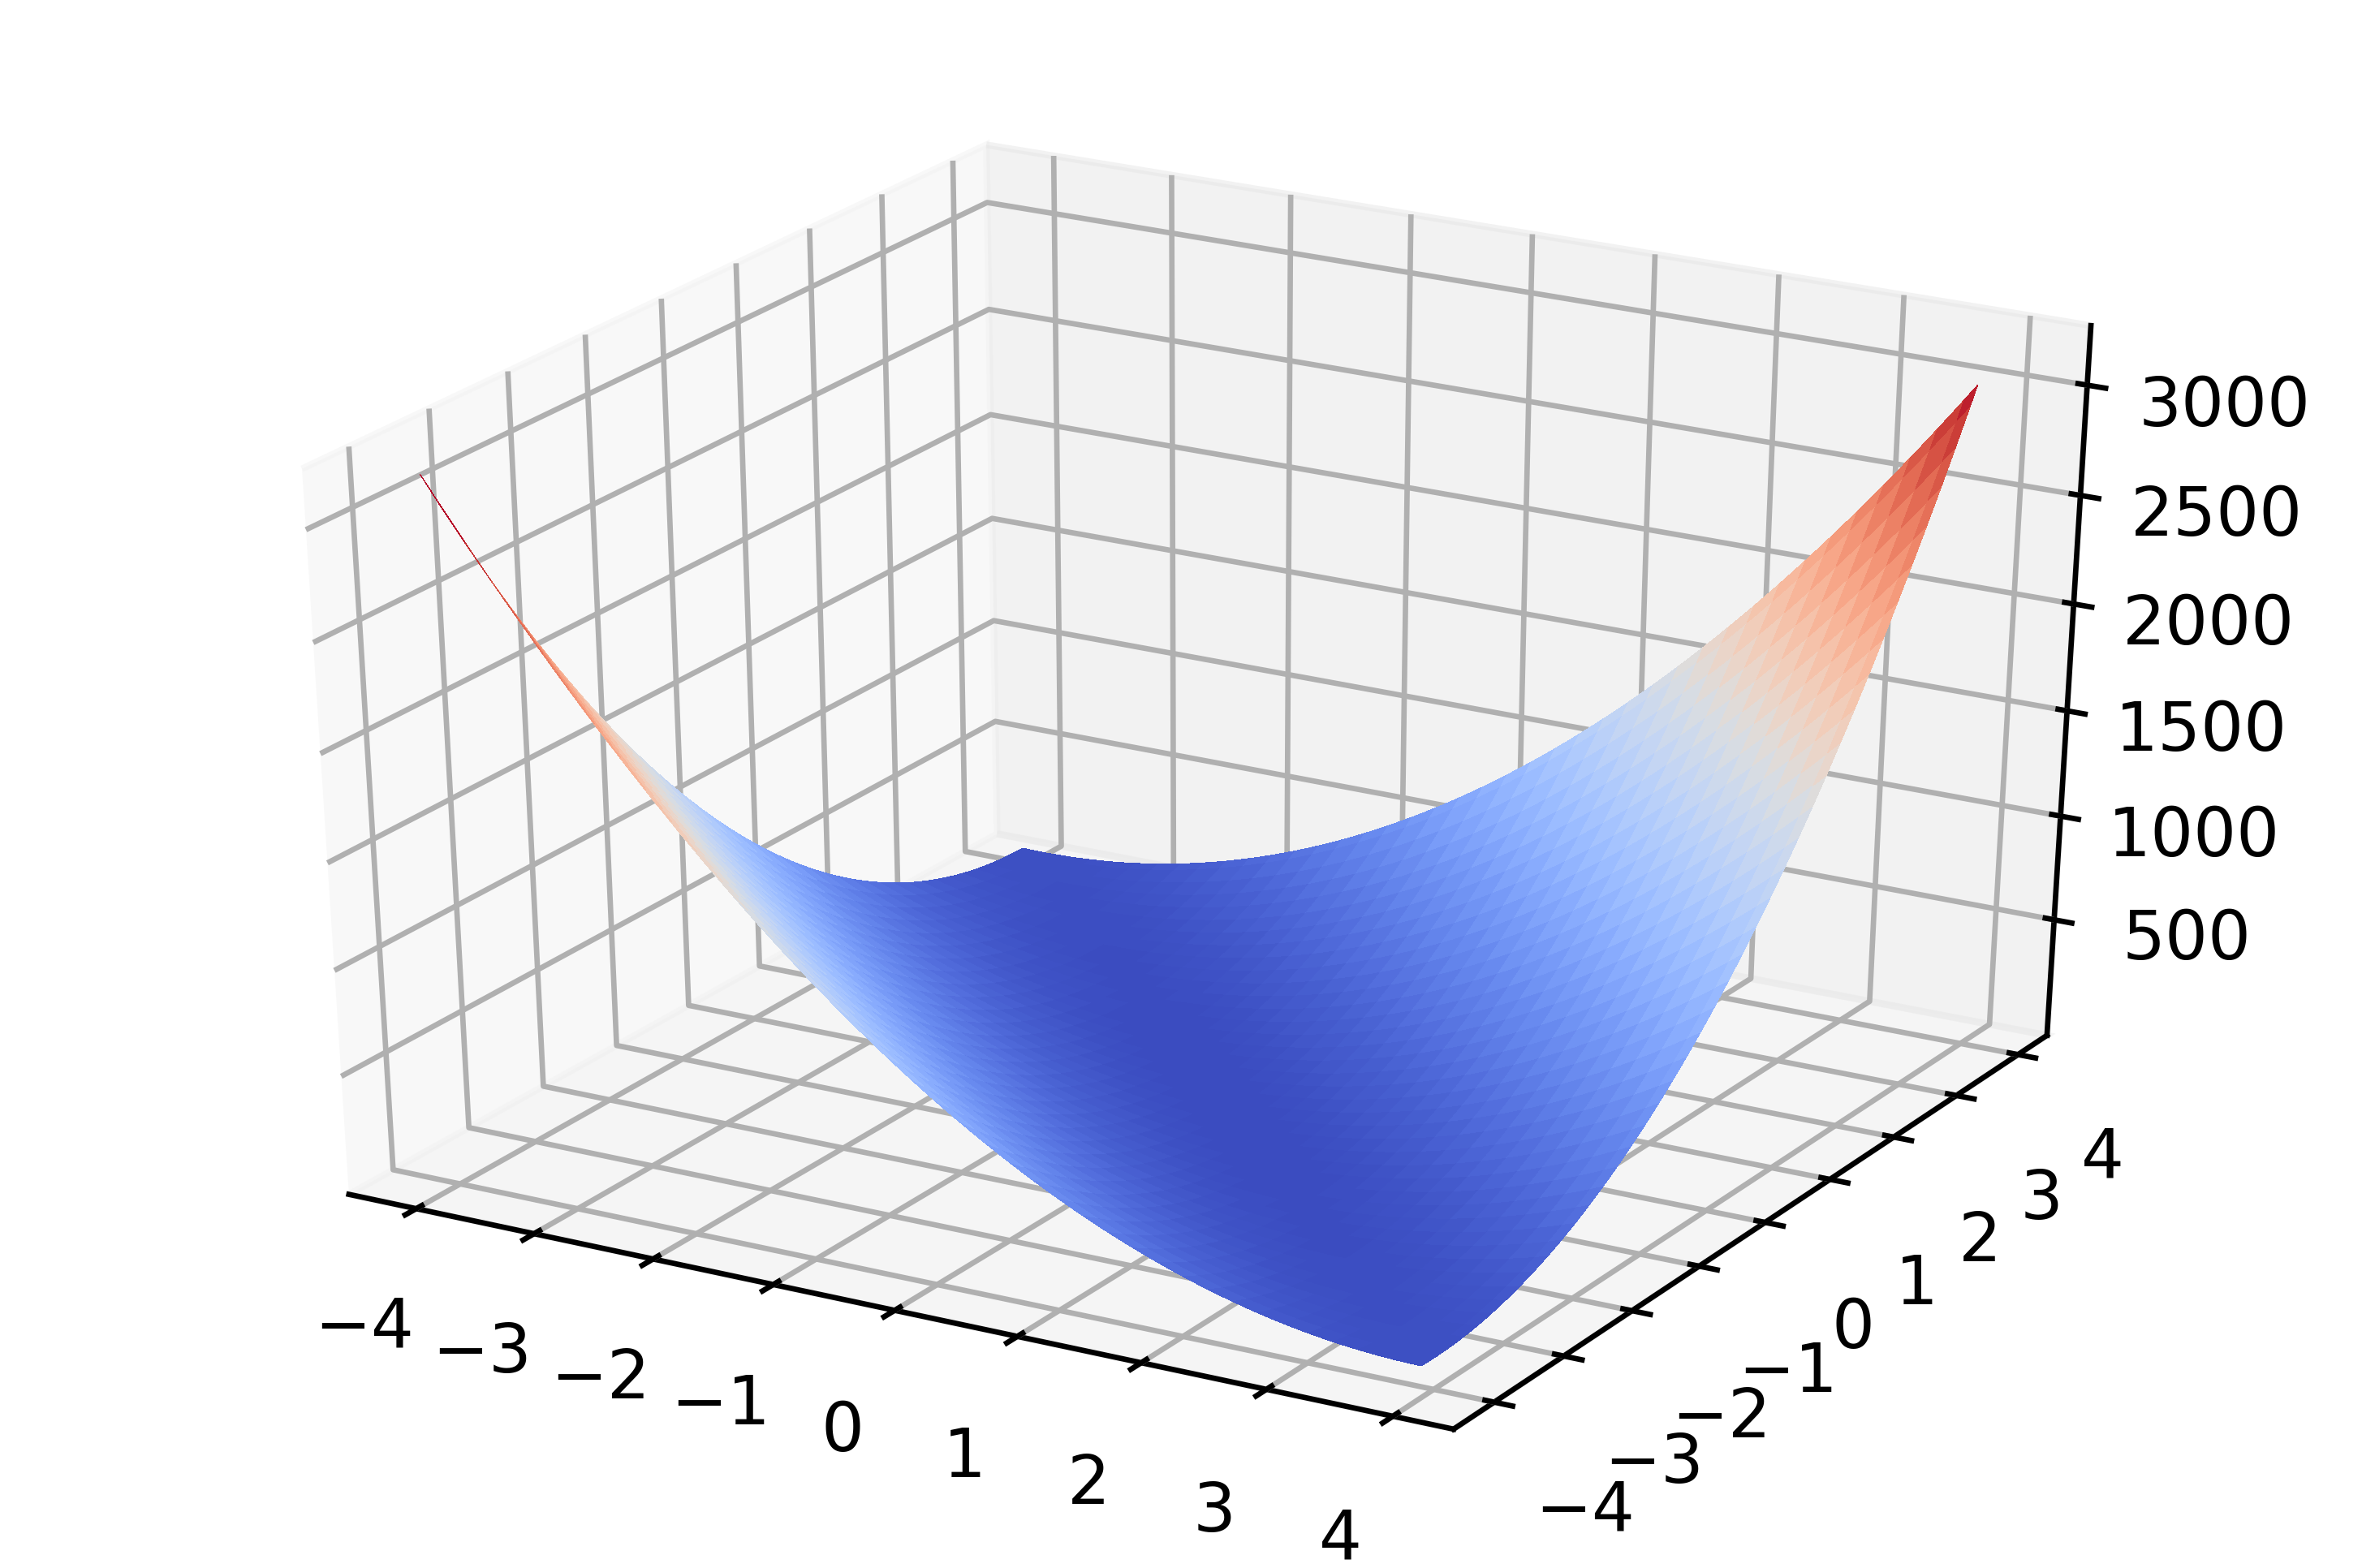

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, E, \
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

## Minimization using Gradient descent

We have:
    $$\frac{\partial E}{x}=2 M_{1,1}x + (M_{1,2}+M_{2,1})y$$
and 
    $$\frac{\partial E}{y}=2 M_{2,2}y + (M_{1,2}+M_{2,1})x$$

Therefore,

$$
\nabla E = \left[\begin{array}{l}
2 M_{1,1}x + (M_{1,2}+M_{2,1})y \\
2 M_{2,2}y + (M_{1,2}+M_{2,1})x
\end{array}
\right]
$$
The update rule for the gradient descent algorithm is:

$$\left[\begin{array}{l}x^{new}\\y^{new}\end{array}\right] = 
\left[\begin{array}{l}x^{old}\\y^{old}\end{array}\right]
- \alpha \nabla E$$

### The gradient descent algorithm

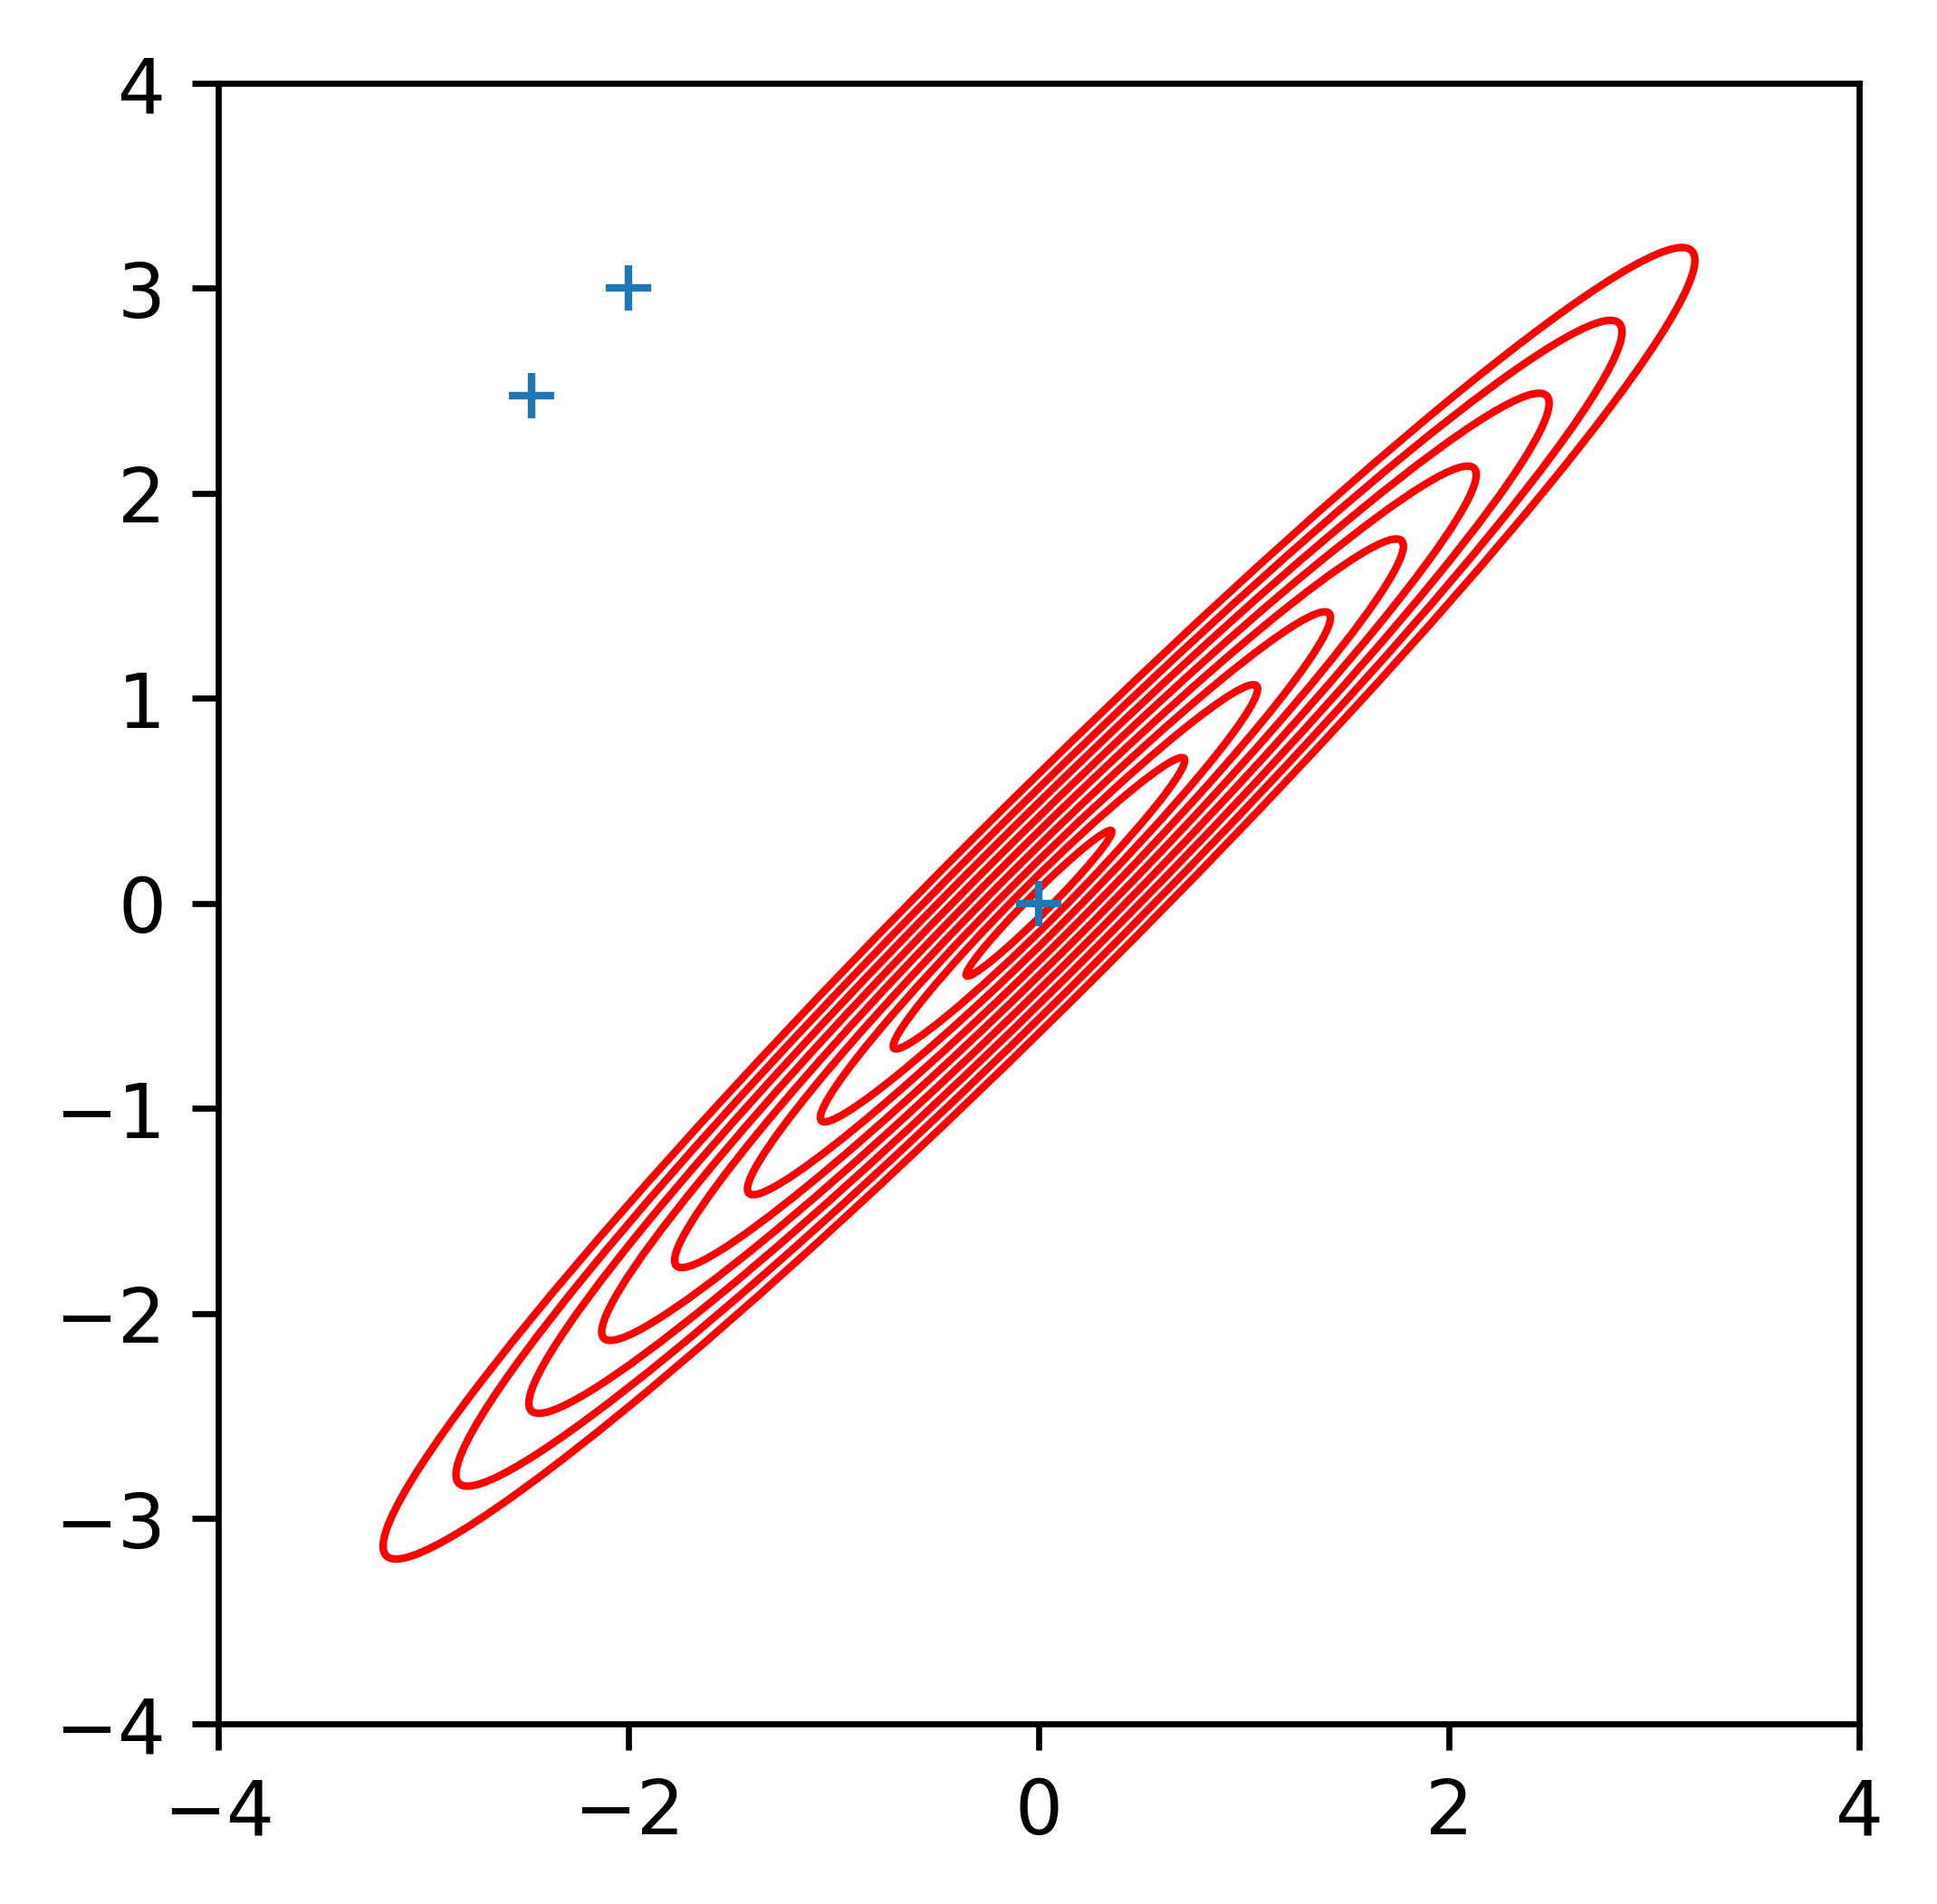

-5.773159728050814e-15
5.773159728050814e-15


In [8]:
T = 3
x = np.zeros([T])
y = np.zeros([T])

x[0] = -2
y[0] = 3
L = [lambda1, lambda2]
max_learning_rate_1 = 1.0 / max(L)
L.remove(max(L))
max_learning_rate_2 = 1.0 / np.max(L)
alpha = max_learning_rate_1 * 0.5

for i in range (1,T):
    if (2*i > T):
        alpha = max_learning_rate_2 * 0.5
    x[i] = x[i-1] - alpha * (2*M[0,0]*x[i-1] + (M[0,1]+M[1,0])*y[i-1])
    y[i] = y[i-1] - alpha * (2*M[1,1]*y[i-1] + (M[0,1]+M[1,0])*x[i-1])

ax = plt.subplot(111, aspect='equal')
for scale in np.arange (10):
    width = scale * a
    height = scale * b
    e = Ellipse((x0, y0), width, height, theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)

plt.plot(x,y,'+')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
print(x[T-1])
print(y[T-1])

Learning Rates:  [0.010000000000000002, 1.0]


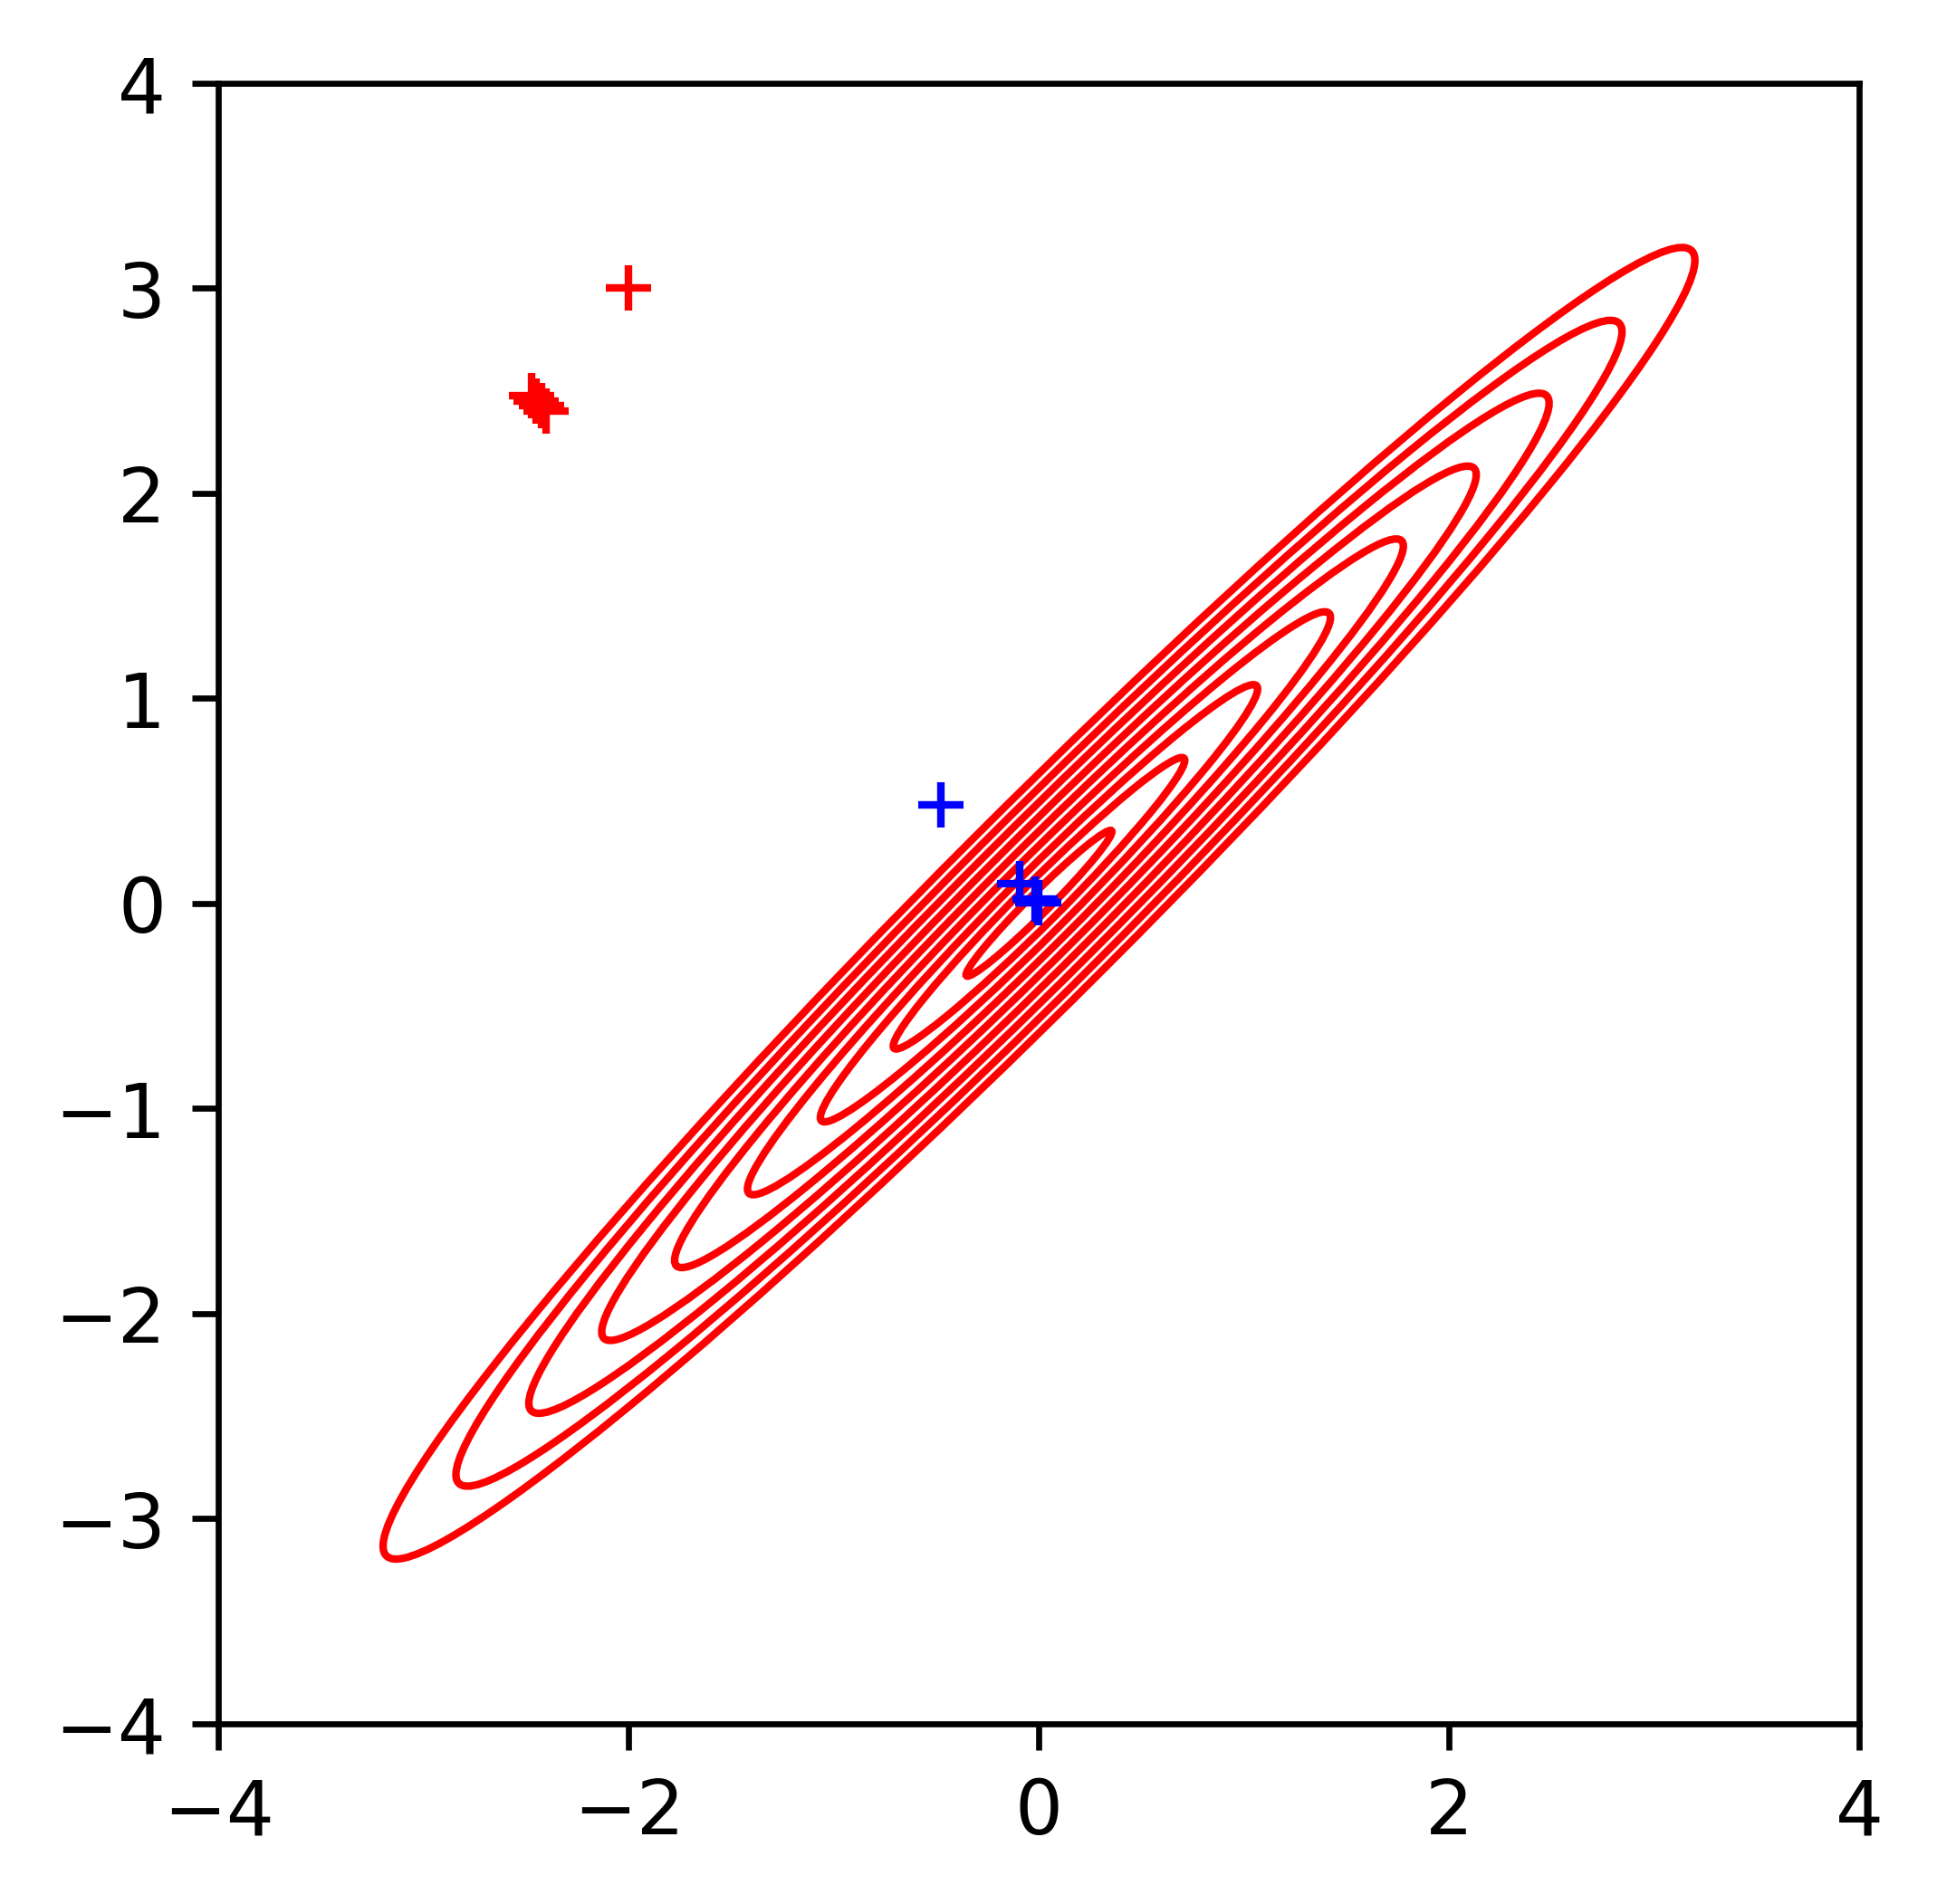

-0.0007684768079999956
0.0007684768079999956


In [9]:
T = 10
x = np.zeros([T])
y = np.zeros([T])

x[0] = -2
y[0] = 3
L = [lambda1, lambda2]
max_learning_rate_1 = 1.0 / max(L)
alpha = max_learning_rate_1 * 0.5

L.remove(max(L))
max_learning_rate_2 = 1.0 / np.max(L)
print ('Learning Rates: ', [max_learning_rate_1, max_learning_rate_2])


for i in range (1,T):
    if (2*i >= T):
        alpha = max_learning_rate_2 * 0.4
    x[i] = x[i-1] - alpha * (2*M[0,0]*x[i-1] + (M[0,1]+M[1,0])*y[i-1])
    y[i] = y[i-1] - alpha * (2*M[1,1]*y[i-1] + (M[0,1]+M[1,0])*x[i-1])

ax = plt.subplot(111, aspect='equal')
for scale in np.arange (10):
    width = scale * a
    height = scale * b
    e = Ellipse((x0, y0), width, height, theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)

plt.plot(x[:T//2],y[:T//2], 'r+')
plt.plot(x[T//2:],y[T//2:], 'b+')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
print(x[T-1])
print(y[T-1])

Learning Rates:  [0.010000000000000002, 1.0]


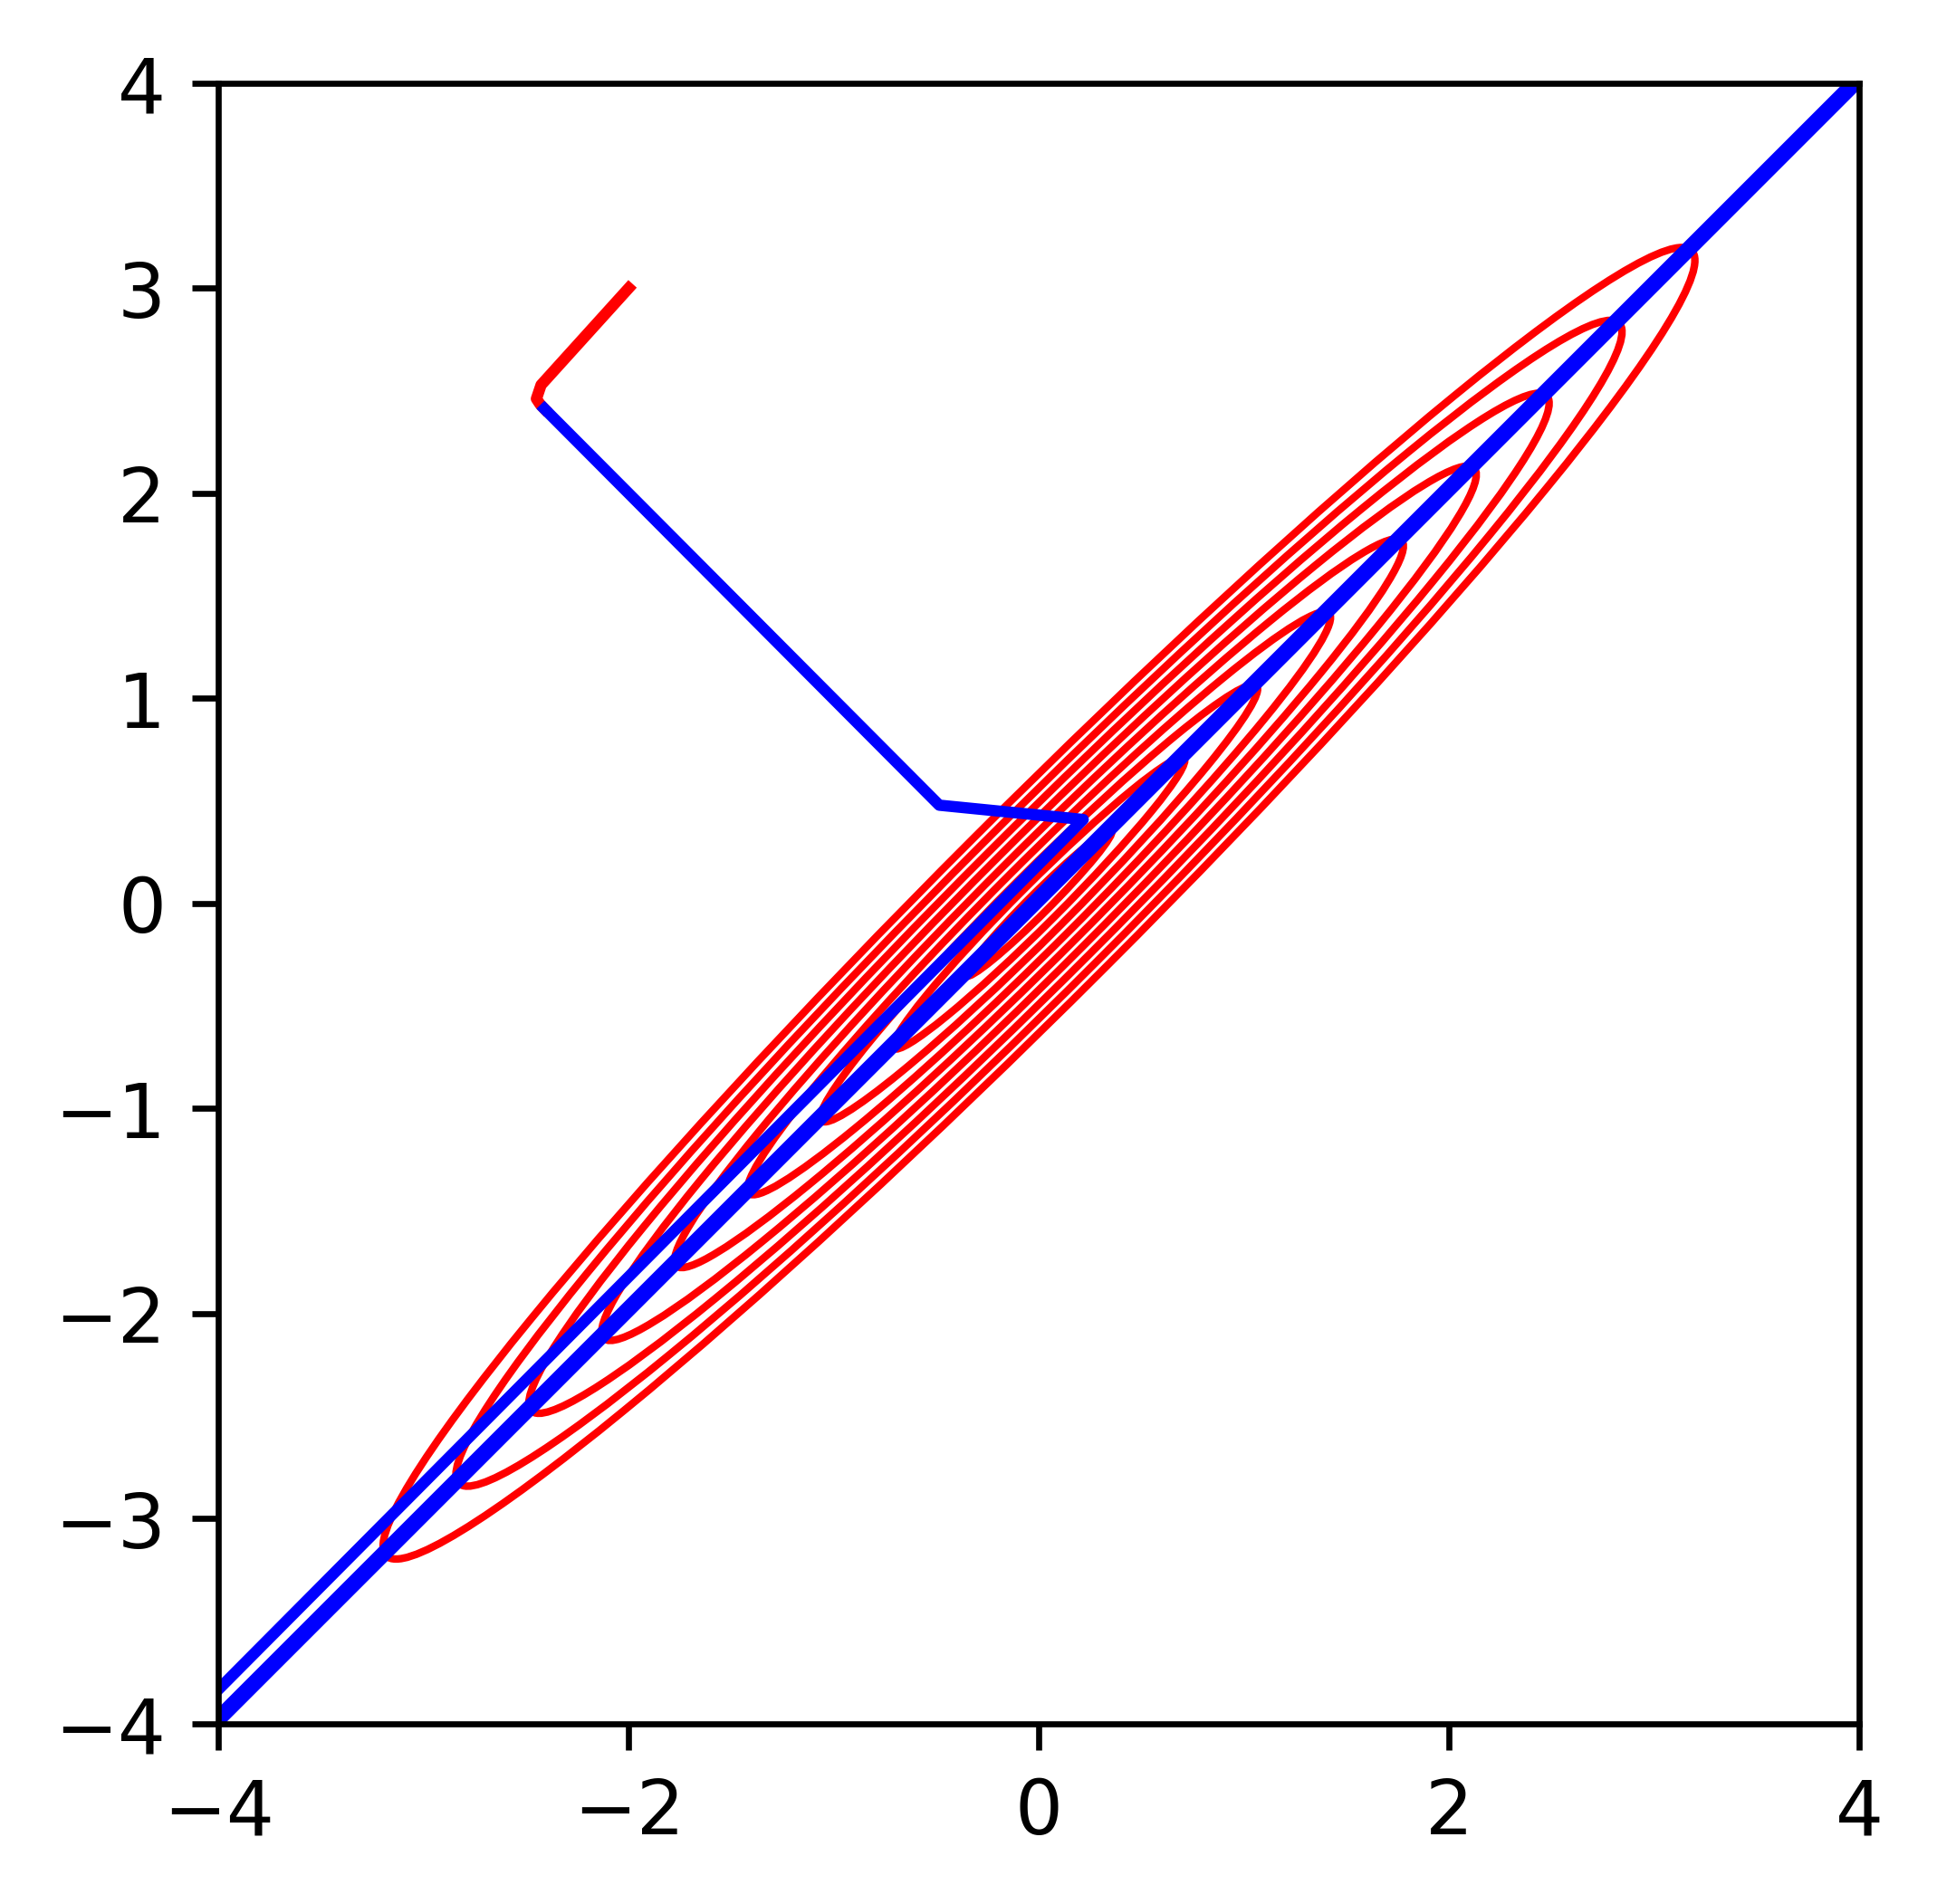

-153852.82072210588
-153852.81917893293


In [10]:
T = 10
x = np.zeros([T])
y = np.zeros([T])

x[0] = -2
y[0] = 3
L = [lambda1, lambda2]
max_learning_rate_1 = 1.0 / max(L)
alpha = max_learning_rate_1 * 0.45

L.remove(max(L))
max_learning_rate_2 = 1.0 / np.max(L)
print ('Learning Rates: ', [max_learning_rate_1, max_learning_rate_2])


for i in range (1,T):
    if (2*i >= T):
        alpha = max_learning_rate_2 * 0.4
    x[i] = x[i-1] - alpha * (2*M[0,0]*x[i-1] + (M[0,1]+M[1,0])*y[i-1])
    y[i] = y[i-1] - alpha * (2*M[1,1]*y[i-1] + (M[0,1]+M[1,0])*x[i-1])

ax = plt.subplot(111, aspect='equal')
for scale in np.arange (10):
    width = scale * a
    height = scale * b
    e = Ellipse((x0, y0), width, height, theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)

plt.plot(x[:T//2],y[:T//2], 'r')
plt.plot(x[T//2-1:],y[T//2-1:], 'b')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
print(x[T-1])
print(y[T-1])